In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [739]:
#Imbalance Dataset
#RAC,ROC Curve
#Model Traiing Apply each model
#Using optuna ,Grid SearchCV,Random Search CV for Hyperparameter tunning
from sklearn.pipeline import Pipeline
#Apply each Evaluation Metrics
#also try to used Deep learning model -ANN or CON 1D
#End to End Pipe line


In [740]:
df=pd.read_csv("/content/final_depression_dataset_1.csv")


In [741]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [742]:
df.drop(columns=['Profession','Degree'],inplace=True)

In [743]:
df.shape

(2556, 17)

In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Academic Pressure                      502 non-null    float64
 6   Work Pressure                          2054 non-null   float64
 7   CGPA                                   502 non-null    float64
 8   Study Satisfaction                     502 non-null    float64
 9   Job Satisfaction                       2054 non-null   float64
 10  Sleep Duration                         2556 non-null   object 
 11  Diet

In [745]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [746]:
df.isnull().sum()

,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Academic Pressure,2054
Work Pressure,502
CGPA,2054
Study Satisfaction,2054
Job Satisfaction,502


In [747]:
df['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Working Professional,2054
Student,502


In [748]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,882
Healthy,842
Moderate,832


In [749]:
df.head(3)


,Name,Gender,Age,City,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,No,0,2,No,No


In [750]:
df['Academic Pressure']=df['Academic Pressure'].fillna(0)
df['Work Pressure']=df['Work Pressure'].fillna(0)
df['Study Satisfaction']=df['Study Satisfaction'].fillna(0)
df['Job Satisfaction']=df['Job Satisfaction'].fillna(0)



In [751]:
def get_last_number(lst):
    nums = [int(x) for x in lst if x.isdigit()]  # keep only digits
    return nums[-1] if nums else None  # return last number if exists

df["Sleep Duration"] = df["Sleep Duration"].apply(get_last_number)




In [752]:
df.drop(columns=['City'],inplace=True)

In [753]:
#Columns Drop
#Profession
#'Degree'
#Name
#Merge==>Academin Pressure +Work Pressure
#Drop GPA
#Slep Duration clean krna ha
#Dietary Habits ==> Ordinal Encoding
#Have you ever had suicidal thoughts ?==>One hot encoding
#Working Professional or Student ==>Ordinal Encoding

#Combine Academic Presure + Work Presure to make Presure Column
#Combine Study Satisfisfication+ Job Satisfication to make Satisfication Column

#and then drop these columns Academic Pressure ,Work Pressure,Study atisfication ,Job Satisfication



In [754]:
df['Academic Pressure'].value_counts()

,count
Academic Pressure,
0.0,2054
3.0,125
1.0,99
5.0,98
4.0,92
2.0,88


In [755]:
df.head(5)

,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Working Professional,0.0,2.0,NaN,0.0,4.0,8,Moderate,No,6,2,No,No
1,Reyansh,Male,60,Working Professional,0.0,4.0,NaN,0.0,3.0,6,Unhealthy,Yes,0,4,Yes,No
2,Manvi,Female,42,Working Professional,0.0,2.0,NaN,0.0,3.0,6,Moderate,No,0,2,No,No
3,Isha,Female,44,Working Professional,0.0,3.0,NaN,0.0,5.0,8,Healthy,Yes,1,2,Yes,No
4,Aarav,Male,48,Working Professional,0.0,4.0,NaN,0.0,3.0,8,Moderate,Yes,6,5,Yes,No


In [756]:
df.drop(columns=['CGPA'],inplace=True)

In [757]:
df['Pressure']=df['Academic Pressure']+df['Work Pressure']
df['Satisfaction']=df['Study Satisfaction']+df['Job Satisfaction']

In [758]:
df.drop(columns=['Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction'],inplace=True)

In [759]:
df

,Name,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,Pooja,Female,37,Working Professional,8,Moderate,No,6,2,No,No,2.0,4.0
1,Reyansh,Male,60,Working Professional,6,Unhealthy,Yes,0,4,Yes,No,4.0,3.0
2,Manvi,Female,42,Working Professional,6,Moderate,No,0,2,No,No,2.0,3.0
3,Isha,Female,44,Working Professional,8,Healthy,Yes,1,2,Yes,No,3.0,5.0
4,Aarav,Male,48,Working Professional,8,Moderate,Yes,6,5,Yes,No,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Working Professional,6,Healthy,Yes,12,3,Yes,No,1.0,5.0
2552,Pihu,Female,23,Working Professional,5,Moderate,Yes,8,3,No,Yes,3.0,1.0
2553,Sara,Female,24,Working Professional,5,Moderate,Yes,4,4,No,No,1.0,4.0
2554,Eshita,Female,56,Working Professional,8,Healthy,No,4,5,Yes,No,2.0,3.0


In [760]:
df['Depression'].value_counts()

,count
Depression,
No,2101
Yes,455


In [761]:
df.isnull().sum()

,0
Name,0
Gender,0
Age,0
Working Professional or Student,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Work/Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [762]:
df.duplicated().sum()

np.int64(0)

In [763]:
df.head(3)

,Name,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,Pooja,Female,37,Working Professional,8,Moderate,No,6,2,No,No,2.0,4.0
1,Reyansh,Male,60,Working Professional,6,Unhealthy,Yes,0,4,Yes,No,4.0,3.0
2,Manvi,Female,42,Working Professional,6,Moderate,No,0,2,No,No,2.0,3.0


In [764]:
df.drop(columns=['Name'],inplace=True)

In [765]:
df['Gender'].value_counts()

,count
Gender,
Male,1333
Female,1223


In [766]:
df.shape

(2556, 12)

In [767]:
df.head(3)

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,Female,37,Working Professional,8,Moderate,No,6,2,No,No,2.0,4.0
1,Male,60,Working Professional,6,Unhealthy,Yes,0,4,Yes,No,4.0,3.0
2,Female,42,Working Professional,6,Moderate,No,0,2,No,No,2.0,3.0


In [768]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
#EDA
#Complete Case Analysis
#Standarization
#Normalization
#Removing Outliers
#Imbalance Dataset
#RAC,ROC Curve
#Model Traiing Apply each model
#Using optuna ,Grid SearchCV,Random Search CV for Hyperparameter tunning
from sklearn.pipeline import Pipeline
#Apply each Evaluation Metrics
#also try to used Deep learning model -ANN or CON 1D
#End to End Pipe line



In [769]:
le=LabelEncoder()
df['Depression']= le.fit_transform(df['Depression'])
X=df.drop(columns=['Depression'])
y=df['Depression']

In [769]:
X

In [770]:
df['Depression'].value_counts()

,count
Depression,
0,2101
1,455


In [771]:
transformer=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),['Gender','Working Professional or Student','Have you ever had suicidal thoughts ?','Family History of Mental Illness']),
    ('trf2',OrdinalEncoder(categories=[['Unhealthy','Moderate','Healthy']]),['Dietary Habits'])


],remainder='passthrough')

In [772]:
df=transformer.fit_transform(df)


In [773]:
df[1:5]

array([[ 1.,  1.,  1.,  1.,  0., 60.,  6.,  0.,  4.,  0.,  4.,  3.],
       [ 0.,  1.,  0.,  0.,  1., 42.,  6.,  0.,  2.,  0.,  2.,  3.],
       [ 0.,  1.,  1.,  1.,  2., 44.,  8.,  1.,  2.,  0.,  3.,  5.],
       [ 1.,  1.,  1.,  1.,  1., 48.,  8.,  6.,  5.,  0.,  4.,  3.]])

In [774]:
new_names=['Gender','Working Professional or Student','Have you ever had suicidal thoughts ?','Family History of Mental Illness','Dietary Habits','Age','Sleep Duration','Work/Study Hours','Financial Stress','Depression','Pressure','Satisfication']

In [775]:
df = pd.DataFrame(df, columns=new_names)


In [776]:
df

,Gender,Working Professional or Student,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Dietary Habits,Age,Sleep Duration,Work/Study Hours,Financial Stress,Depression,Pressure,Satisfication
0,0.0,1.0,0.0,0.0,1.0,37.0,8.0,6.0,2.0,0.0,2.0,4.0
1,1.0,1.0,1.0,1.0,0.0,60.0,6.0,0.0,4.0,0.0,4.0,3.0
2,0.0,1.0,0.0,0.0,1.0,42.0,6.0,0.0,2.0,0.0,2.0,3.0
3,0.0,1.0,1.0,1.0,2.0,44.0,8.0,1.0,2.0,0.0,3.0,5.0
4,1.0,1.0,1.0,1.0,1.0,48.0,8.0,6.0,5.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1.0,1.0,1.0,1.0,2.0,25.0,6.0,12.0,3.0,0.0,1.0,5.0
2552,0.0,1.0,1.0,0.0,1.0,23.0,5.0,8.0,3.0,1.0,3.0,1.0
2553,0.0,1.0,1.0,0.0,1.0,24.0,5.0,4.0,4.0,0.0,1.0,4.0
2554,0.0,1.0,0.0,1.0,2.0,56.0,8.0,4.0,5.0,0.0,2.0,3.0


In [777]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Always good for nice style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


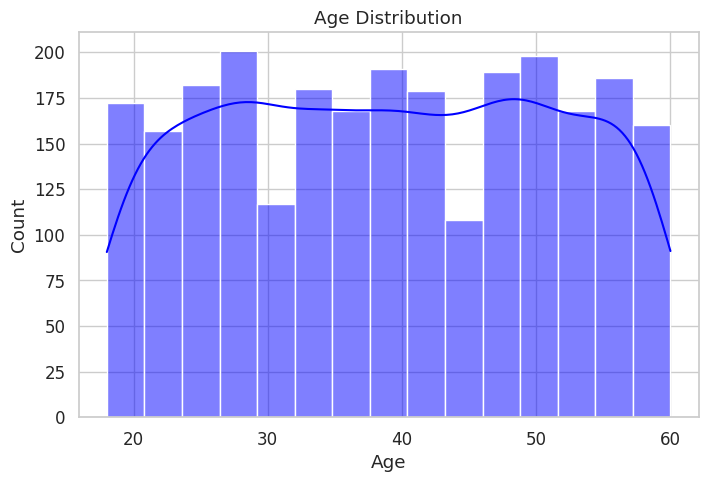

In [778]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-2512502048.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




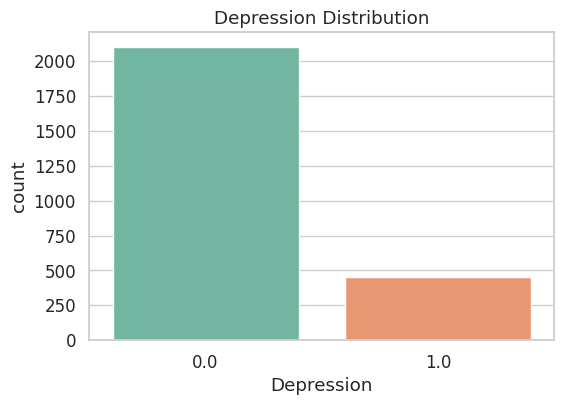

In [779]:
plt.figure(figsize=(6,4))
sns.countplot(x="Depression", data=df, palette="Set2")
plt.title("Depression Distribution")
plt.show()


In [780]:
count=df['Depression'].value_counts()

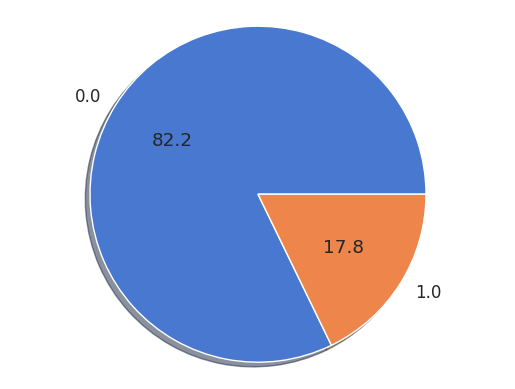

In [781]:
plt.pie(count,labels=count.index,autopct="%1.1f",shadow="yellow")
plt.axis("equal")
plt.show()

/tmp/ipython-input-569282143.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




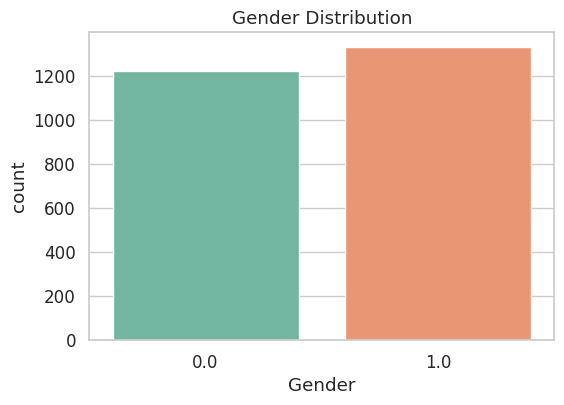

In [782]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()


/tmp/ipython-input-3913536854.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




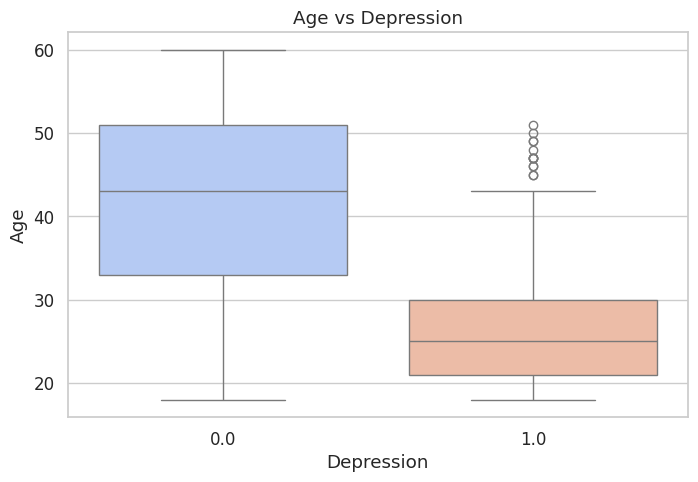

In [783]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Depression", y="Age", data=df, palette="coolwarm")
plt.title("Age vs Depression")
plt.show()


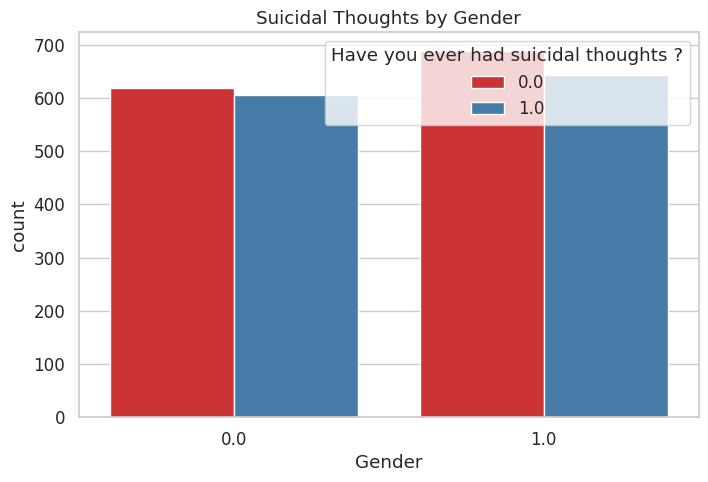

In [784]:
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", hue="Have you ever had suicidal thoughts ?", data=df, palette="Set1")
plt.title("Suicidal Thoughts by Gender")
plt.show()


/tmp/ipython-input-1148920456.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




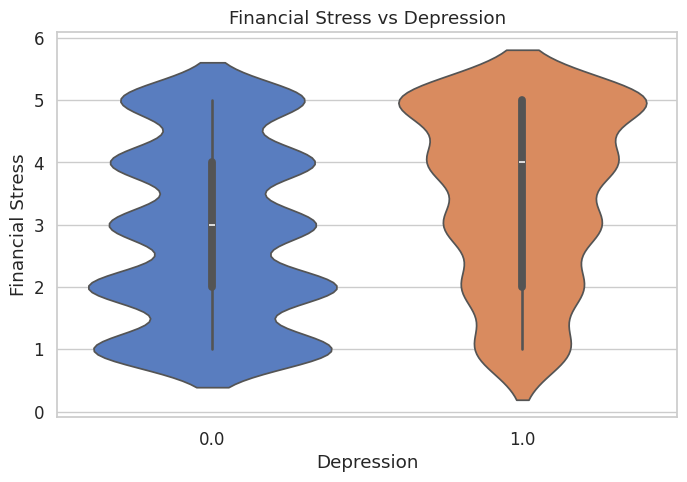

In [785]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Depression", y="Financial Stress", data=df, palette="muted")
plt.title("Financial Stress vs Depression")
plt.show()


/tmp/ipython-input-3200923717.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




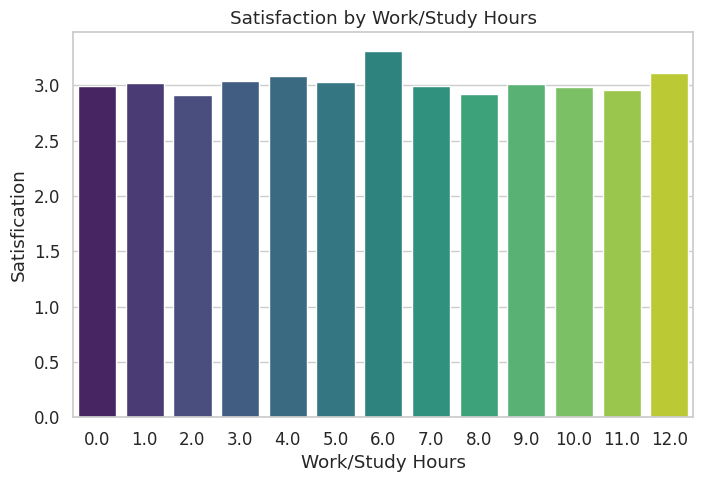

In [786]:
plt.figure(figsize=(8,5))
sns.barplot(x="Work/Study Hours", y="Satisfication", data=df, palette="viridis", errorbar=None)
plt.title("Satisfaction by Work/Study Hours")
plt.show()


In [787]:
import plotly.express as px
import plotly.graph_objects as go


In [788]:
fig = px.histogram(df, x="Age", nbins=15, marginal="box",
                   title="Age Distribution", color_discrete_sequence=["blue"])
fig.show()


In [789]:
import numpy as np

corr = df.corr(numeric_only=True)
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale="RdBu",
    zmin=-1, zmax=1,
    text=np.round(corr.values, 2),
    texttemplate="%{text}"
))
fig.update_layout(title="Correlation Heatmap")
fig.show()


In [790]:
fig = px.scatter(df, x="Age", y="Work/Study Hours", color="Depression",
                 size="Financial Stress", hover_data=["Satisfication"],
                 title="Age vs Work/Study Hours (Colored by Depression)")
fig.show()


In [791]:
fig = px.violin(df, x="Depression", y="Financial Stress",
                box=True, points="all", title="Financial Stress vs Depression")
fig.show()


In [792]:
fig = px.parallel_categories(
    df[["Gender","Depression","Dietary Habits","Have you ever had suicidal thoughts ?"]],
    color=df["Depression"].astype(int),
    title="Categorical Relationships"
)
fig.show()


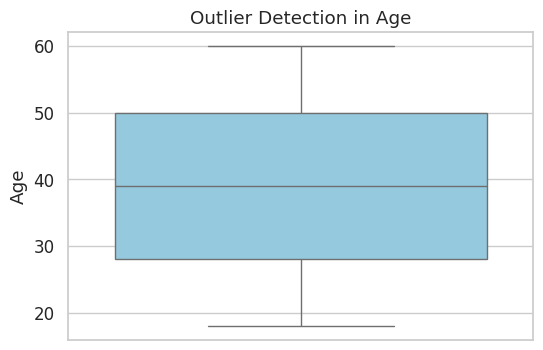

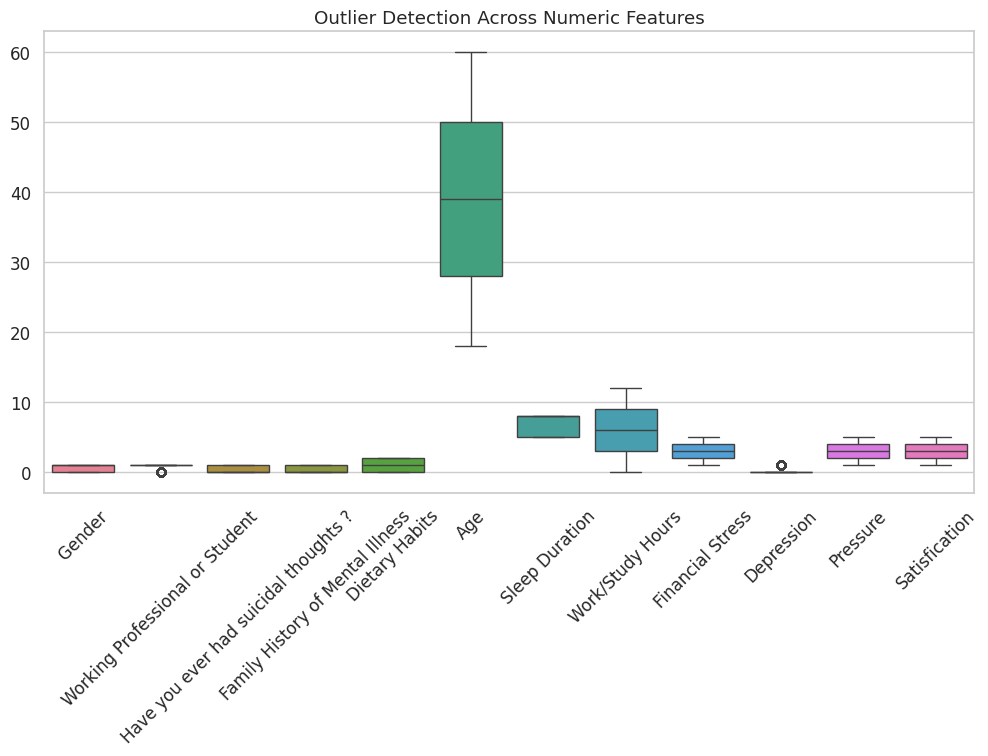

In [793]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example with Age
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Age'], color="skyblue")
plt.title("Outlier Detection in Age")
plt.show()

# For all numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Outlier Detection Across Numeric Features")
plt.xticks(rotation=45)
plt.show()


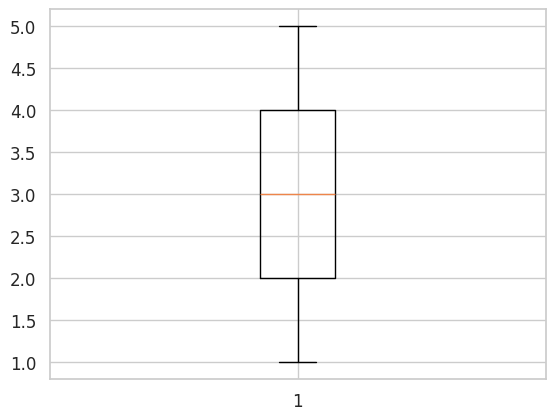

In [794]:
plt.boxplot(df['Satisfication'])
plt.show()

<Axes: ylabel='Density'>

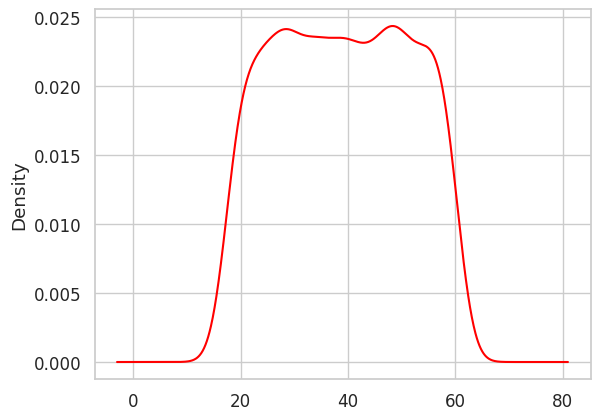

In [795]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Age'].plot.density(color='red')




<Axes: ylabel='Density'>

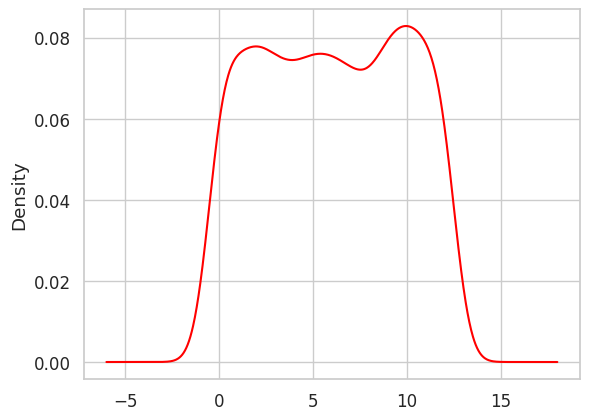

In [796]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Work/Study Hours'].plot.density(color='red')



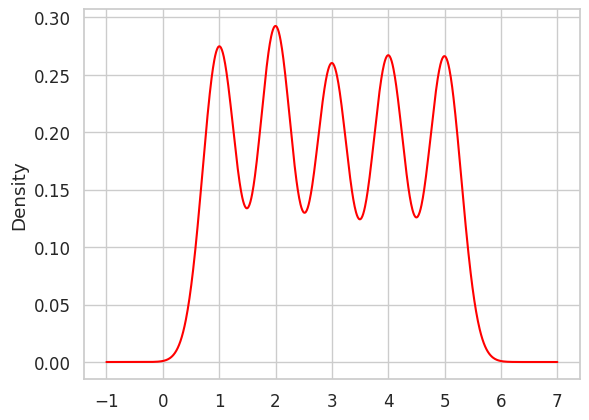

In [797]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Financial Stress'].plot.density(color='red')
plt.show()




In [798]:
from scipy import stats

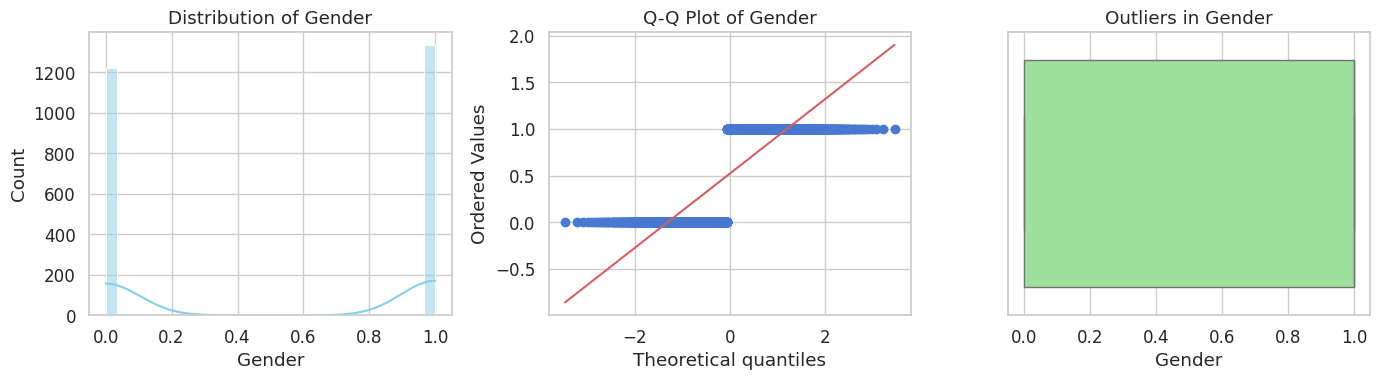

Skewness of Gender: -0.09
✅ Gender looks fairly normal, no need for normalization



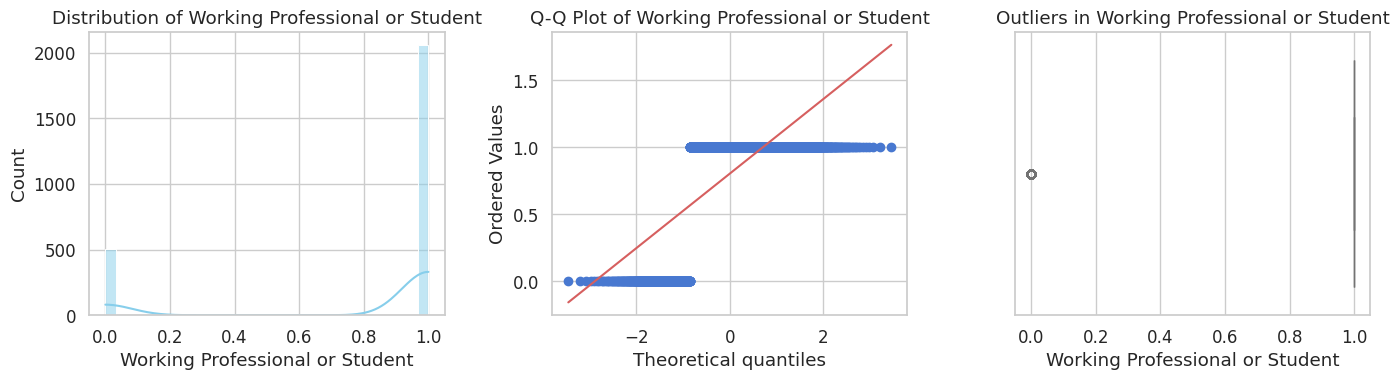

Skewness of Working Professional or Student: -1.53
⚠️ Working Professional or Student is highly skewed → Consider normalization or transformation



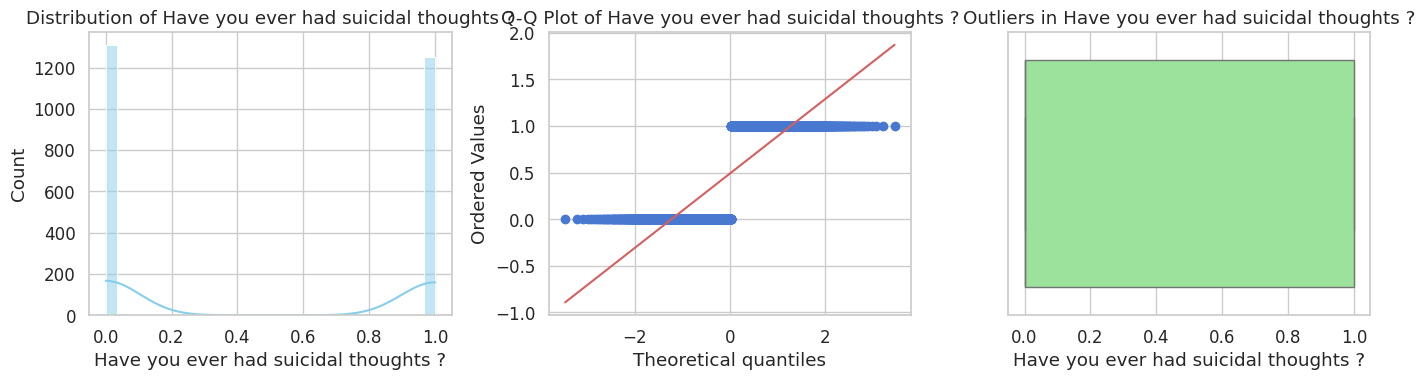

Skewness of Have you ever had suicidal thoughts ?: 0.05
✅ Have you ever had suicidal thoughts ? looks fairly normal, no need for normalization



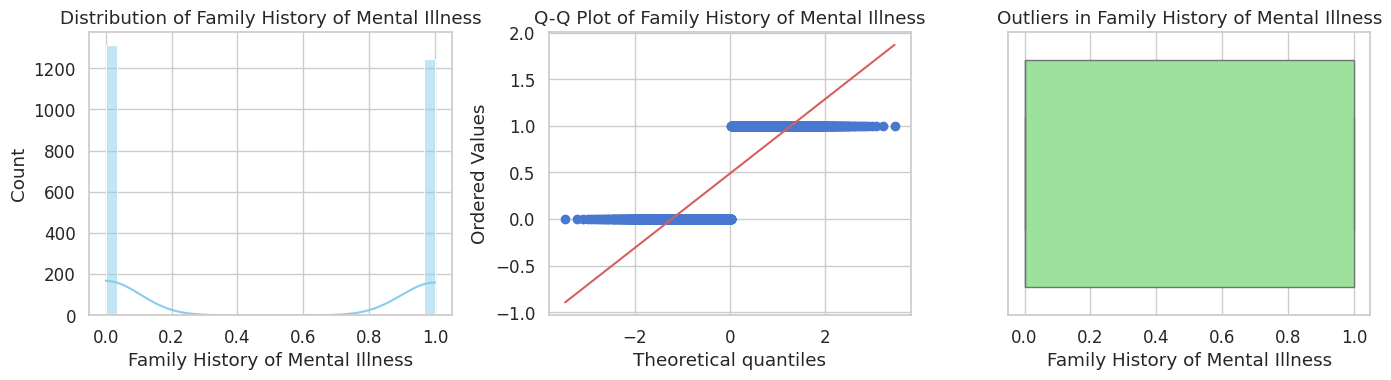

Skewness of Family History of Mental Illness: 0.05
✅ Family History of Mental Illness looks fairly normal, no need for normalization



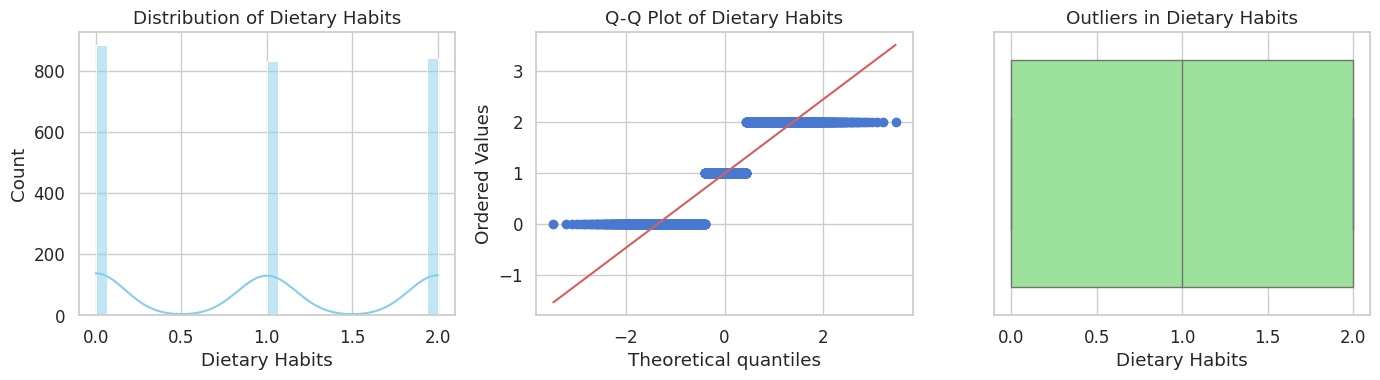

Skewness of Dietary Habits: 0.03
✅ Dietary Habits looks fairly normal, no need for normalization



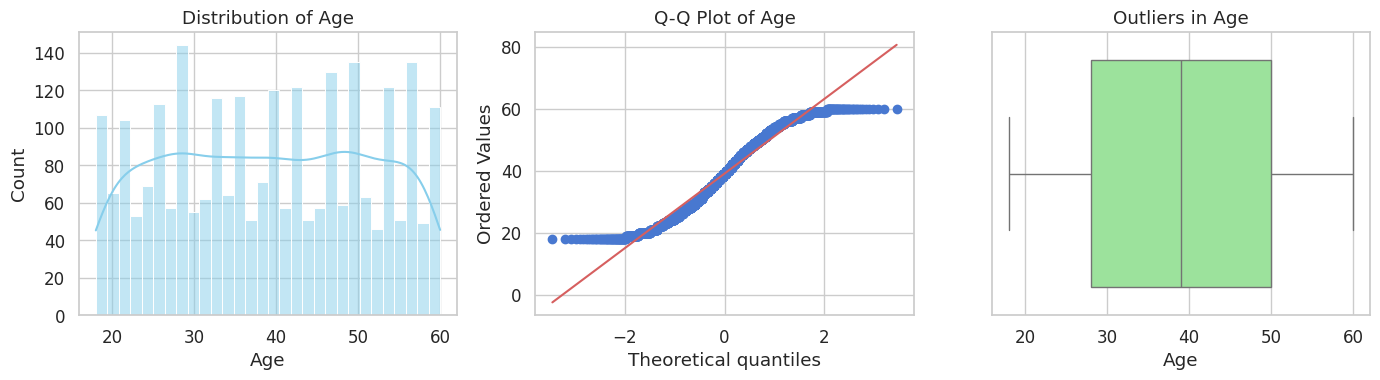

Skewness of Age: -0.01
✅ Age looks fairly normal, no need for normalization



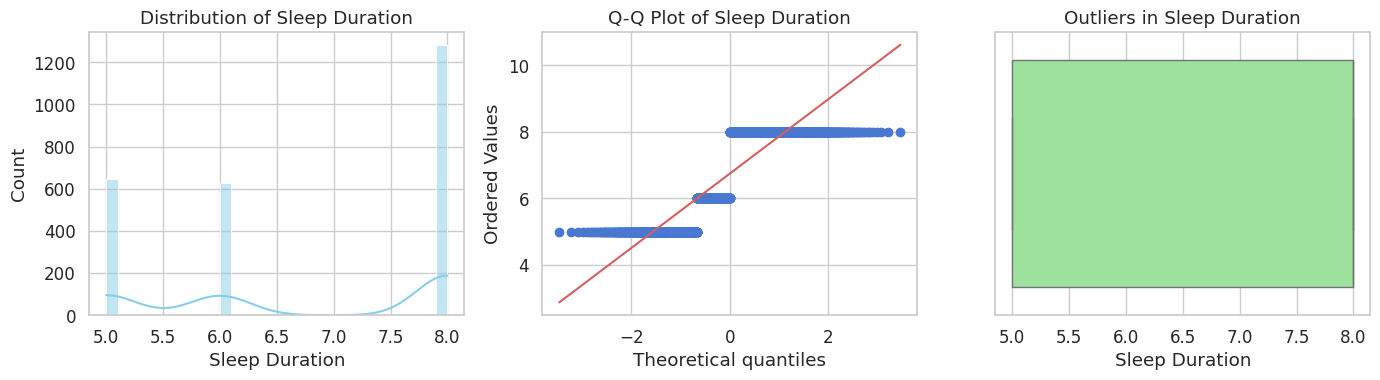

Skewness of Sleep Duration: -0.21
✅ Sleep Duration looks fairly normal, no need for normalization



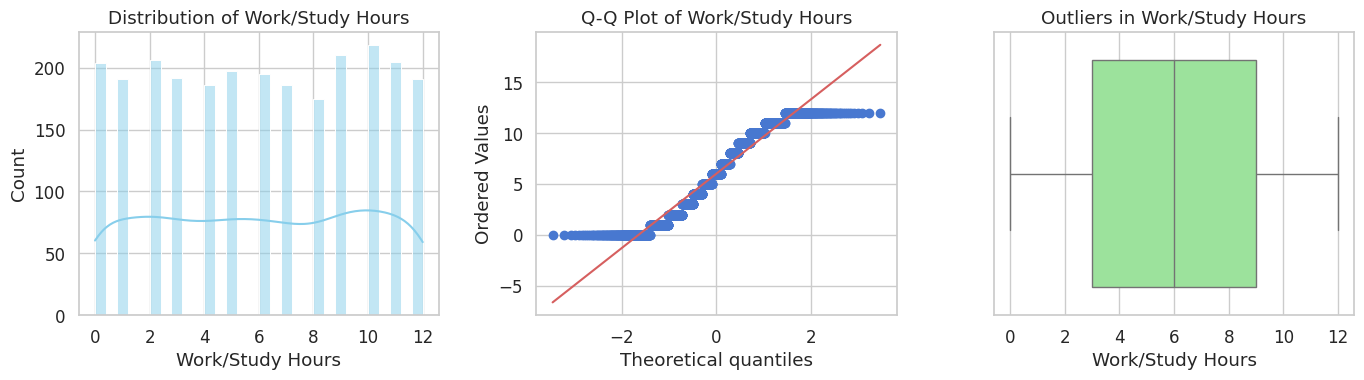

Skewness of Work/Study Hours: -0.02
✅ Work/Study Hours looks fairly normal, no need for normalization



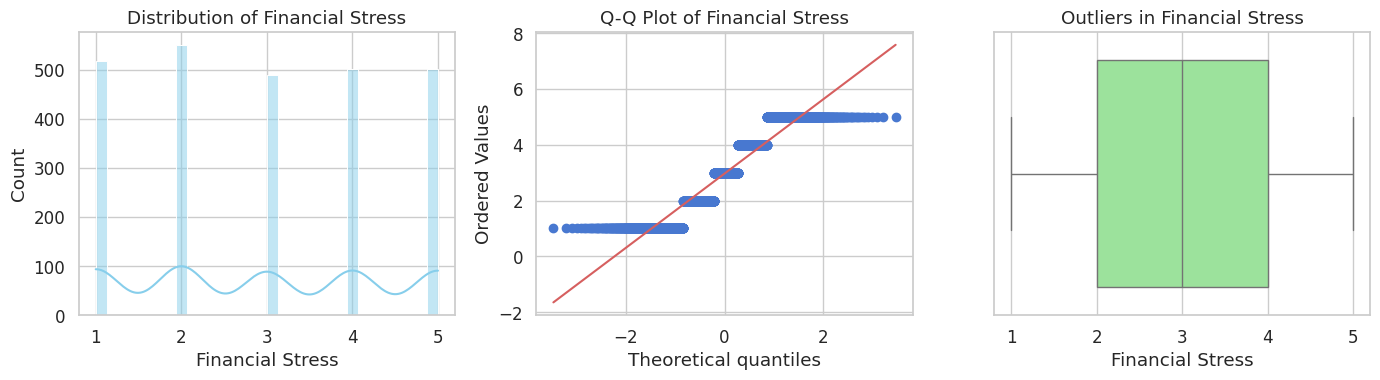

Skewness of Financial Stress: 0.04
✅ Financial Stress looks fairly normal, no need for normalization



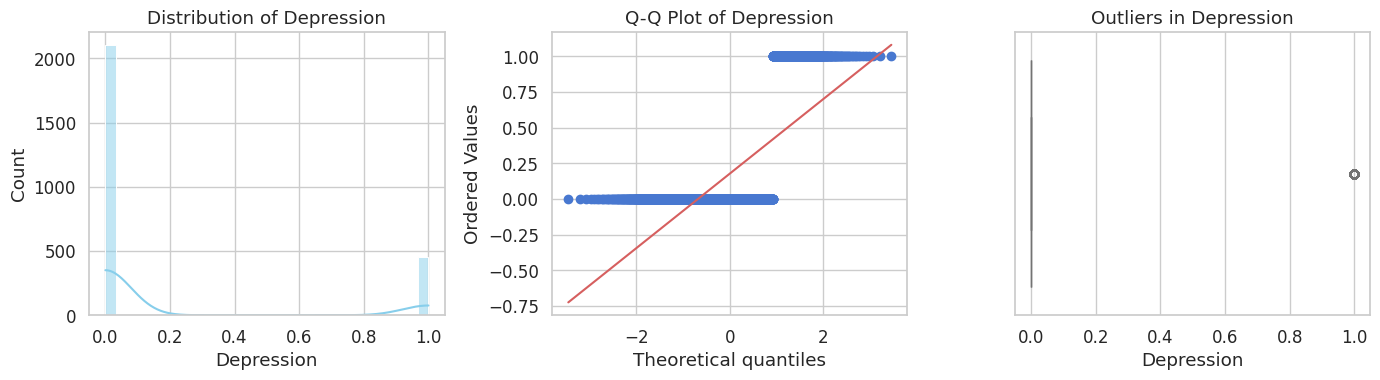

Skewness of Depression: 1.68
⚠️ Depression is highly skewed → Consider normalization or transformation



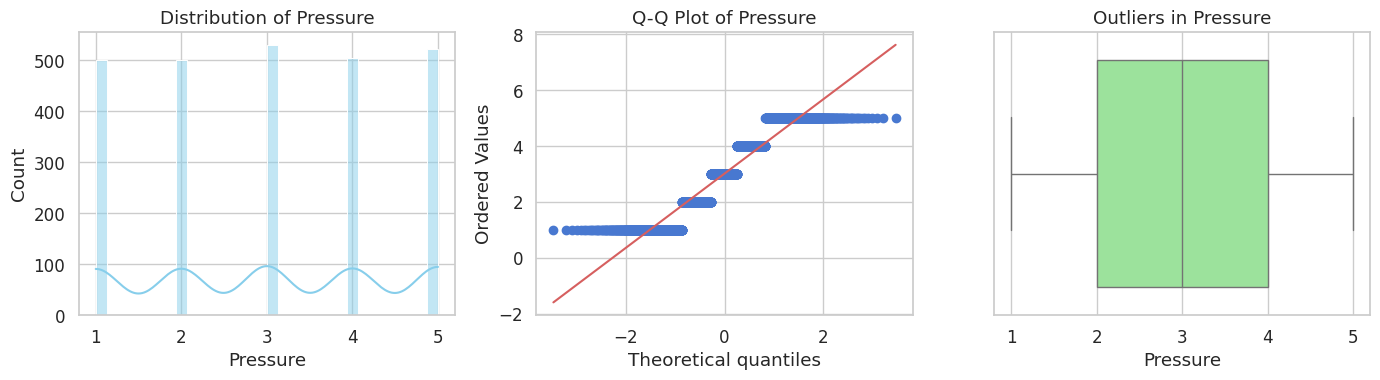

Skewness of Pressure: -0.01
✅ Pressure looks fairly normal, no need for normalization



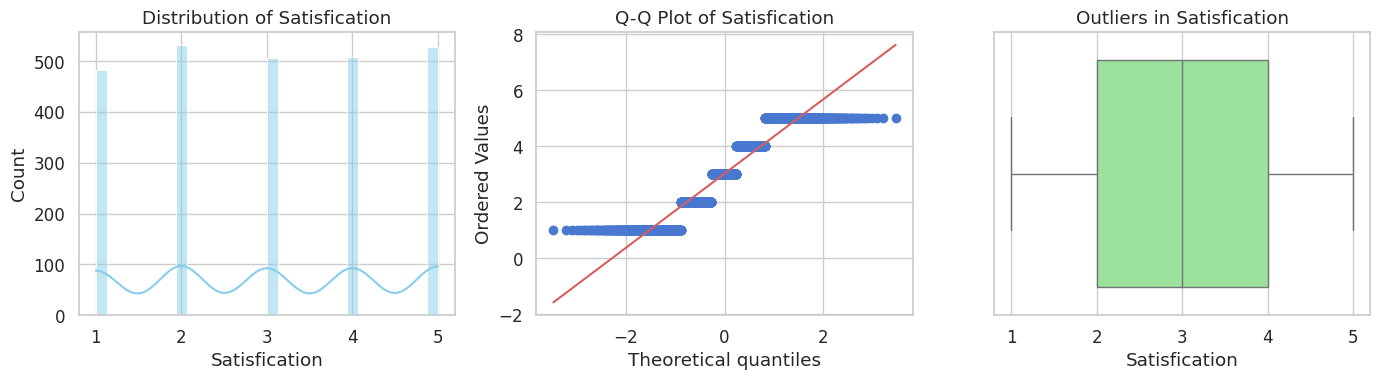

Skewness of Satisfication: -0.01
✅ Satisfication looks fairly normal, no need for normalization



In [799]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(14,4))

    # Histogram + KDE
    plt.subplot(131)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")

    # Q-Q Plot
    plt.subplot(132)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    # Boxplot for outliers
    plt.subplot(133)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Outliers in {col}")

    plt.tight_layout()
    plt.show()

    # Calculate skewness
    skew = df[col].skew()
    print(f"Skewness of {col}: {skew:.2f}")
    if abs(skew) > 1:
        print(f"⚠️ {col} is highly skewed → Consider normalization or transformation\n")
    else:
        print(f"✅ {col} looks fairly normal, no need for normalization\n")


In [800]:
df.duplicated().sum()

np.int64(0)

In [801]:
from sklearn.model_selection import train_test_split

In [802]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Depression']),df['Depression'],test_size=0.2,random_state=42)

In [803]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2044, 11)
(512, 11)
(2044,)
(512,)


In [804]:
from sklearn.preprocessing import MaxAbsScaler
mx=MaxAbsScaler()    # Because of Two much sparse values

In [805]:
x_train=mx.fit_transform(x_train)
x_test=mx.transform(x_test)

# **BEST MODEL FOR MY CASE**

In [806]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [807]:
lr=LogisticRegression(max_iter=200,class_weight={0:60,1:90})
lr.fit(x_train,y_train)
#60:90==>3:2

LogisticRegression(class_weight={0: 60, 1: 90}, max_iter=200)

In [808]:
y_pred_lr = lr.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.990234375
F1 Score: 0.9696969696969697
Precision: 0.975609756097561
Confusion Matrix:
 [[427   2]
 [  3  80]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       429
         1.0       0.98      0.96      0.97        83

    accuracy                           0.99       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.99      0.99      0.99       512



## **I prefer my model to give more importance to cases where a person does not have depression, so it should not wrongly predict them as depressed. On the other hand, if my model predicts a depressed person as not depressed, I personally feel that many patients, after hearing they are suffering from this disease, may become more depressed. Therefore, in such cases, I want my model to predict a depressed person as not depressed.**

In [809]:
from sklearn.tree import DecisionTreeClassifier

In [810]:
dt=DecisionTreeClassifier(max_features=6,min_samples_split=9)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_features=6, min_samples_split=9)

In [811]:
y_pred_dt = dt.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.90625
F1 Score: 0.7333333333333333
Precision: 0.6804123711340206
Confusion Matrix:
 [[398  31]
 [ 17  66]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       429
         1.0       0.68      0.80      0.73        83

    accuracy                           0.91       512
   macro avg       0.82      0.86      0.84       512
weighted avg       0.91      0.91      0.91       512



In [812]:
from sklearn.ensemble import VotingClassifier

In [813]:
vt=VotingClassifier(estimators=[('lr1',LogisticRegression(max_iter=200,class_weight={0:60,1:100})),('lr2',LogisticRegression(max_iter=200,class_weight={0:20,1:90})),('lr3',LogisticRegression(max_iter=200,class_weight={0:100,1:100}))],voting='soft')
vt.fit(x_train,y_train)

VotingClassifier(estimators=[('lr1',
                              LogisticRegression(class_weight={0: 60, 1: 100},
                                                 max_iter=200)),
                             ('lr2',
                              LogisticRegression(class_weight={0: 20, 1: 90},
                                                 max_iter=200)),
                             ('lr3',
                              LogisticRegression(class_weight={0: 100, 1: 100},
                                                 max_iter=200))],
                 voting='soft')

In [814]:
y_pred_vt = vt.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_vt))
print("F1 Score:", f1_score(y_test, y_pred_vt))
print("Precision:", precision_score(y_test, y_pred_vt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vt))
print("Classification Report:\n", classification_report(y_test, y_pred_vt))


Accuracy: 0.986328125
F1 Score: 0.9585798816568047
Precision: 0.9418604651162791
Confusion Matrix:
 [[424   5]
 [  2  81]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       429
         1.0       0.94      0.98      0.96        83

    accuracy                           0.99       512
   macro avg       0.97      0.98      0.98       512
weighted avg       0.99      0.99      0.99       512



In [815]:
from sklearn.svm import SVC

In [816]:
sv=SVC(kernel='poly',degree=3)
sv.fit(x_train,y_train)

SVC(kernel='poly')

In [817]:
y_pred_sv = sv.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_sv))
print("F1 Score:", f1_score(y_test, y_pred_sv))
print("Precision:", precision_score(y_test, y_pred_sv))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sv))
print("Classification Report:\n", classification_report(y_test, y_pred_sv))

Accuracy: 0.98828125
F1 Score: 0.9629629629629629
Precision: 0.9873417721518988
Confusion Matrix:
 [[428   1]
 [  5  78]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       429
         1.0       0.99      0.94      0.96        83

    accuracy                           0.99       512
   macro avg       0.99      0.97      0.98       512
weighted avg       0.99      0.99      0.99       512



In [818]:
from sklearn.ensemble import RandomForestClassifier

In [819]:


rd = RandomForestClassifier(
    n_estimators=200,
    class_weight={0:20, 1:90},
    random_state=42
)
rd.fit(x_train, y_train)



RandomForestClassifier(class_weight={0: 20, 1: 90}, n_estimators=200,
                       random_state=42)

In [820]:
y_pred_rd= rd.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rd))
print("F1 Score:", f1_score(y_test, y_pred_rd))
print("Precision:", precision_score(y_test, y_pred_rd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rd))
print("Classification Report:\n", classification_report(y_test, y_pred_rd))

Accuracy: 0.953125
F1 Score: 0.8378378378378378
Precision: 0.9538461538461539
Confusion Matrix:
 [[426   3]
 [ 21  62]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       429
         1.0       0.95      0.75      0.84        83

    accuracy                           0.95       512
   macro avg       0.95      0.87      0.91       512
weighted avg       0.95      0.95      0.95       512



In [821]:
from sklearn.neighbors import KNeighborsClassifier

In [822]:
kn=KNeighborsClassifier(n_neighbors=15)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [823]:
y_pred_kn= kn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_kn))
print("F1 Score:", f1_score(y_test, y_pred_kn))
print("Precision:", precision_score(y_test, y_pred_kn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_kn))
print("Classification Report:\n", classification_report(y_test, y_pred_kn))

Accuracy: 0.88671875
F1 Score: 0.5671641791044776
Precision: 0.7450980392156863
Confusion Matrix:
 [[416  13]
 [ 45  38]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       429
         1.0       0.75      0.46      0.57        83

    accuracy                           0.89       512
   macro avg       0.82      0.71      0.75       512
weighted avg       0.88      0.89      0.88       512



In [824]:
from sklearn.naive_bayes import ComplementNB

In [825]:
gb=ComplementNB()

In [826]:
gb.fit(x_train,y_train)

ComplementNB()

In [827]:
y_pred_gb= gb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.869140625
F1 Score: 0.6940639269406392
Precision: 0.5588235294117647
Confusion Matrix:
 [[369  60]
 [  7  76]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92       429
         1.0       0.56      0.92      0.69        83

    accuracy                           0.87       512
   macro avg       0.77      0.89      0.81       512
weighted avg       0.91      0.87      0.88       512



In [828]:
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier

In [829]:
gd=HistGradientBoostingClassifier()
gd.fit(x_train,y_train)
y_pred_gd= gd.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gd))
print("F1 Score:", f1_score(y_test, y_pred_gd))
print("Precision:", precision_score(y_test, y_pred_gd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gd))
print("Classification Report:\n", classification_report(y_test, y_pred_gd))

Accuracy: 0.95703125
F1 Score: 0.8641975308641975
Precision: 0.8860759493670886
Confusion Matrix:
 [[420   9]
 [ 13  70]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       429
         1.0       0.89      0.84      0.86        83

    accuracy                           0.96       512
   macro avg       0.93      0.91      0.92       512
weighted avg       0.96      0.96      0.96       512



In [830]:
from xgboost import XGBClassifier

In [831]:
xb=XGBClassifier()

In [832]:
xb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [833]:


y_pred_xb= xb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xb))
print("F1 Score:", f1_score(y_test, y_pred_xb))
print("Precision:", precision_score(y_test, y_pred_xb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xb))
print("Classification Report:\n", classification_report(y_test, y_pred_xb))

Accuracy: 0.966796875
F1 Score: 0.8930817610062893
Precision: 0.9342105263157895
Confusion Matrix:
 [[424   5]
 [ 12  71]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       429
         1.0       0.93      0.86      0.89        83

    accuracy                           0.97       512
   macro avg       0.95      0.92      0.94       512
weighted avg       0.97      0.97      0.97       512



In [834]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

# **ROC_AUC AND FINDING BEST THRESHOLDS**

# **Threshold For Logistic Regression**

In [835]:
y_predict_prob=lr.predict_proba(x_test)[:,1]

In [836]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(y_test,y_predict_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test,y_predict_prob)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

In [837]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.24141237241776198


In [838]:

# 5. Apply custom threshold (0.24 instead of 0.5)
threshold = 0.24
y_pred_custom = (y_predict_prob >= threshold).astype(int)

# 6. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix:
 [[420   9]
 [  0  83]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       429
         1.0       0.90      1.00      0.95        83

    accuracy                           0.98       512
   macro avg       0.95      0.99      0.97       512
weighted avg       0.98      0.98      0.98       512



# **Random Sampling on Decision Tree**

In [839]:
from imblearn.under_sampling import RandomUnderSampler
rn=RandomUnderSampler(random_state=42)

In [840]:
x_random_sam,y_random_sam=rn.fit_resample(x_train,y_train)

In [841]:
dt.fit(x_random_sam,y_random_sam)
y_predict_dt_us=dt.predict(x_test)

print(f' Accracy Score with DecisionTree is: {accuracy_score(y_test,y_predict_dt_us)}')

 Accracy Score with DecisionTree is: 0.884765625


In [842]:
print('Precision Score with DecisionTree is :',precision_score(y_test,y_predict_dt_us))
print('Recall Score with linear DecisionTree is :',recall_score(y_test,y_predict_dt_us))
print('f1 score with linear DecisionTree is ',f1_score(y_test,y_predict_dt_us))

Precision Score with DecisionTree is : 0.6052631578947368
Recall Score with linear DecisionTree is : 0.8313253012048193
f1 score with linear DecisionTree is  0.700507614213198


In [843]:
cm_dt= confusion_matrix(y_test, y_predict_dt_us)
df_cm_dt = pd.DataFrame(cm_dt, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(df_cm_dt)

                 Predicted Negative  Predicted Positive
Actual Negative                 384                  45
Actual Positive                  14                  69


In [844]:
report = classification_report(y_test, y_predict_dt_us)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       429
         1.0       0.61      0.83      0.70        83

    accuracy                           0.88       512
   macro avg       0.79      0.86      0.81       512
weighted avg       0.91      0.88      0.89       512



# ROC/ROC_AUC_SCORE

In [845]:
from sklearn.metrics import roc_auc_score,roc_curve

In [846]:
print("ROC AUC Score:", roc_auc_score(y_test,y_predict_dt_us))

ROC AUC Score: 0.8632150981548572


In [847]:
y_predict_prob_dt=dt.predict_proba(x_test)[:,1]

# **Threshold For DecisionTreeClassifier**

In [848]:
import plotly.graph_objects as go
fpr1,tpr1,thresholds=roc_curve(y_test,y_predict_prob_dt)


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr1,
    y=tpr1,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc_score(y_test,y_predict_prob_dt):.2f})'
)

# Only label every nth point to avoid cluttering
n = 2
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr1[indices],
    y=tpr1[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()
#we can used here

In [849]:
optimal_idx = np.argmax(tpr1 - fpr1)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.3333333333333333


In [850]:
# 5. Apply custom threshold (0.24 instead of 0.5)
threshold = 0.33
y_pred_custom = (y_predict_prob_dt >= threshold).astype(int)

# 6. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix:
 [[371  58]
 [  7  76]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92       429
         1.0       0.57      0.92      0.70        83

    accuracy                           0.87       512
   macro avg       0.77      0.89      0.81       512
weighted avg       0.91      0.87      0.88       512



# **CalibratedClassifier To avoid any Error**

In [851]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_dt = CalibratedClassifierCV(dt, method='sigmoid', cv=5)
calibrated_dt.fit(x_random_sam,y_random_sam)
y_proba_calibrated = calibrated_dt.predict_proba(x_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_calibrated)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold is :', optimal_threshold)

Optimal Threshold is : 0.5169379449412574


In [852]:
y_pred_optimal = (y_proba_calibrated >= optimal_threshold).astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_optimal)
print("New Confusion Matrix:\n", cm)

New Confusion Matrix:
 [[376  53]
 [  6  77]]


# **RandomOverSampling**

In [853]:
from imblearn.over_sampling import RandomOverSampler

In [854]:
ros=RandomOverSampler(random_state=42)

In [855]:
x_resample_os,y_resample_os=ros.fit_resample(x_train,y_train)

In [856]:
lr=LogisticRegression()

In [857]:
lr.fit(x_resample_os,y_resample_os)

LogisticRegression()

In [858]:
y_predict_os=lr.predict(x_test)
print(f' Accracy Score with DecisionTree is: {accuracy_score(y_test,y_predict_os)}')

 Accracy Score with DecisionTree is: 0.947265625


In [859]:
print('Precision Score with DecisionTree is :',precision_score(y_test,y_predict_os))
print('Recall Score with linear DecisionTree is :',recall_score(y_test,y_predict_os))
print('f1 score with linear DecisionTree is ',f1_score(y_test,y_predict_os))

Precision Score with DecisionTree is : 0.7592592592592593
Recall Score with linear DecisionTree is : 0.9879518072289156
f1 score with linear DecisionTree is  0.8586387434554974


In [860]:
cm_dt= confusion_matrix(y_test, y_predict_os)
df_cm_dt = pd.DataFrame(cm_dt, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(df_cm_dt)

                 Predicted Negative  Predicted Positive
Actual Negative                 403                  26
Actual Positive                   1                  82


In [861]:
report = classification_report(y_test, y_predict_os)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       429
         1.0       0.76      0.99      0.86        83

    accuracy                           0.95       512
   macro avg       0.88      0.96      0.91       512
weighted avg       0.96      0.95      0.95       512



In [862]:
print("ROC AUC Score:", roc_auc_score(y_test,y_predict_os))

ROC AUC Score: 0.9636728733114275


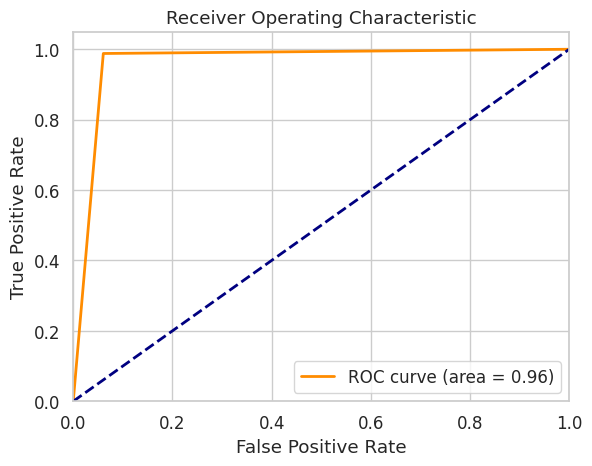

In [863]:
fpr,tpr,threshold=roc_curve(y_test,y_predict_os)

fpr, tpr, _ = roc_curve(y_test, y_predict_os)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_predict_os))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# SMOTE TECHNIQUE

In [864]:
from imblearn.over_sampling import SMOTE


In [865]:
smote=SMOTE(random_state=42)

In [866]:
x_resampled_smote, y_resampled_smote = smote.fit_resample(x_train, y_train)

In [867]:
lr.fit(x_resampled_smote,y_resampled_smote)

LogisticRegression()

In [868]:
y_predict_smote=lr.predict(x_test)
print(f' Accracy Score with DecisionTree is: {accuracy_score(y_test,y_predict_smote)}')

 Accracy Score with DecisionTree is: 0.9609375


In [869]:
print('Precision Score with DecisionTree is :',precision_score(y_test,y_predict_smote))
print('Recall Score with linear DecisionTree is :',recall_score(y_test,y_predict_smote))
print('f1 score with linear DecisionTree is ',f1_score(y_test,y_predict_smote))

Precision Score with DecisionTree is : 0.8118811881188119
Recall Score with linear DecisionTree is : 0.9879518072289156
f1 score with linear DecisionTree is  0.8913043478260869


In [870]:
cm_dt= confusion_matrix(y_test, y_predict_smote)
df_cm_dt = pd.DataFrame(cm_dt, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(df_cm_dt)

                 Predicted Negative  Predicted Positive
Actual Negative                 410                  19
Actual Positive                   1                  82


In [871]:
print("ROC AUC Score:", roc_auc_score(y_test,y_predict_smote))

ROC AUC Score: 0.9718313814699356


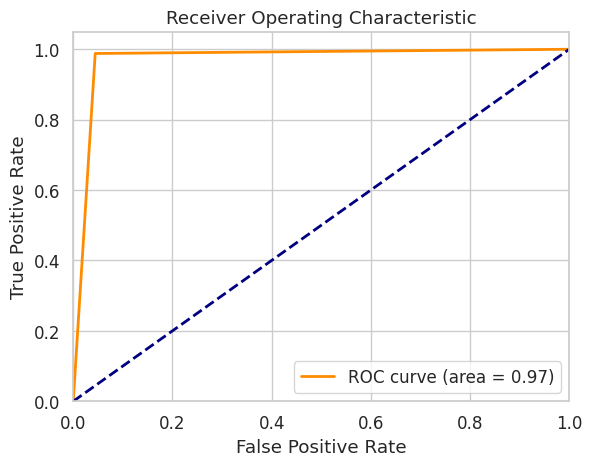

In [872]:
fpr,tpr,threshold=roc_curve(y_test,y_predict_smote)

fpr, tpr, _ = roc_curve(y_test, y_predict_smote)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_predict_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Balanced Random Forest Classifier**

In [873]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [874]:
br=BalancedRandomForestClassifier(n_estimators=100,random_state=42)

In [875]:
br.fit(x_train,y_train)

BalancedRandomForestClassifier(random_state=42)

In [876]:
y_predict_rd=br.predict(x_test)

In [877]:
y_scores_rds=br.predict_proba(x_test)[:,1]

In [878]:
print(f' Accracy Score with DecisionTree is: {accuracy_score(y_test,y_predict_rd)}')

 Accracy Score with DecisionTree is: 0.939453125


In [879]:
print('Precision Score with DecisionTree is :',precision_score(y_test,y_predict_rd))
print('Recall Score with linear DecisionTree is :',recall_score(y_test,y_predict_rd))
print('f1 score with linear DecisionTree is ',f1_score(y_test,y_predict_rd))

Precision Score with DecisionTree is : 0.7549019607843137
Recall Score with linear DecisionTree is : 0.927710843373494
f1 score with linear DecisionTree is  0.8324324324324325


In [880]:
cm_dt= confusion_matrix(y_test,y_predict_rd)
df_cm_dt = pd.DataFrame(cm_dt, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(df_cm_dt)


                 Predicted Negative  Predicted Positive
Actual Negative                 404                  25
Actual Positive                   6                  77


In [881]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(y_test,y_scores_rds)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test,y_scores_rds)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

In [882]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.42


In [883]:
y_pred_optimal = (y_proba_calibrated >= optimal_threshold).astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_optimal)
print("New Confusion Matrix:\n", cm)

New Confusion Matrix:
 [[353  76]
 [  5  78]]


# **Class weight**

In [884]:
# Create a logistic regression model with class weights
model = LogisticRegression(class_weight='balanced', solver='liblinear')

In [885]:
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [886]:
y_predict_cw=model.predict(x_test)

In [887]:
print(f' Accracy Score with LogisticRegression is: {accuracy_score(y_test,y_predict_cw)}')

 Accracy Score with LogisticRegression is: 0.947265625


In [888]:
print('Precision Score with DecisionTree is :',precision_score(y_test,y_predict_cw))
print('Recall Score with linear DecisionTree is :',recall_score(y_test,y_predict_cw))
print('f1 score with linear DecisionTree is ',f1_score(y_test,y_predict_cw))

Precision Score with DecisionTree is : 0.7641509433962265
Recall Score with linear DecisionTree is : 0.9759036144578314
f1 score with linear DecisionTree is  0.8571428571428571


# **HyperParameter Tunning Using Optuna(Bayesian Optimization)**

In [889]:
!pip install optuna

In [890]:
import optuna
from sklearn.model_selection import cross_val_score

In [891]:
def objective(trial):
    # Encode class_weight as string
    weight_option = trial.suggest_categorical(
        'class_weight',
        ['40_80', '45_85', '35_90', '20_90', '60_90']
    )

    # Decode into dict
    cw_map = {
        '40_80': {0: 40, 1: 80},
        '45_85': {0: 45, 1: 85},
        '35_90': {0: 35, 1: 90},
        '20_90': {0: 20, 1: 90},
        '60_90': {0: 60, 1: 90},
    }
    class_weight = cw_map[weight_option]

    max_iter = trial.suggest_int('max_iter', 50, 250)

    lr = LogisticRegression(max_iter=max_iter, class_weight=class_weight)

    score = cross_val_score(lr, x_train, y_train, cv=3, scoring='accuracy').mean()
    return score


In [892]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=10)


[I 2025-09-14 05:28:45,877] A new study created in memory with name: no-name-0b57f0d6-83e7-42ab-9a8a-bb8906345087
[I 2025-09-14 05:28:45,928] Trial 0 finished with value: 0.9863011240729018 and parameters: {'class_weight': '40_80', 'max_iter': 113}. Best is trial 0 with value: 0.9863011240729018.
[I 2025-09-14 05:28:45,959] Trial 1 finished with value: 0.9863011240729018 and parameters: {'class_weight': '40_80', 'max_iter': 131}. Best is trial 0 with value: 0.9863011240729018.
[I 2025-09-14 05:28:45,991] Trial 2 finished with value: 0.9863011240729018 and parameters: {'class_weight': '40_80', 'max_iter': 111}. Best is trial 0 with value: 0.9863011240729018.
[I 2025-09-14 05:28:46,030] Trial 3 finished with value: 0.9863011240729018 and parameters: {'class_weight': '40_80', 'max_iter': 103}. Best is trial 0 with value: 0.9863011240729018.
[I 2025-09-14 05:28:46,060] Trial 4 finished with value: 0.9867906003333032 and parameters: {'class_weight': '35_90', 'max_iter': 250}. Best is trial 

In [893]:
# Print the best result
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')


Best trial accuracy: 0.9867906003333032
Best hyperparameters: {'class_weight': '35_90', 'max_iter': 250}


In [894]:
cw_map = {
        '40_80': {0: 40, 1: 80},
        '45_85': {0: 45, 1: 85},
        '35_90': {0: 35, 1: 90},
        '20_90': {0: 20, 1: 90},
        '60_90': {0: 60, 1: 90},
    }
# Get best parameters
best_params = study.best_trial.params

# Convert class_weight string back to dict
best_params['class_weight'] = cw_map[best_params['class_weight']]

# Now build best model
best_model = LogisticRegression(**best_params)
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
print(f'Best model accuracy: {accuracy_score(y_test, y_pred)}')

Best model accuracy: 0.982421875


In [895]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study)

In [896]:
import pickle

In [897]:
with open('Logistic_Model.pkl','wb') as file:
  pickle.dump(best_model,file)

In [898]:
import xgboost as xgb

In [899]:
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
    }

    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "eval-logloss")

    bst = xgb.train(
        param,
        dtrain,
        num_boost_round=300,
        evals=[(dtrain, "train"), (dtest, "eval")],
        early_stopping_rounds=30,
        callbacks=[pruning_callback]
    )

    preds = bst.predict(dtest)
    best_preds = [1 if p > 0.5 else 0 for p in preds]

    accuracy = accuracy_score(y_test, best_preds)
    return accuracy


In [900]:
# Create a study with pruning
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.SuccessiveHalvingPruner())
study.optimize(objective, n_trials=50)

# Output the best trial
print(f"Best trial: {study.best_trial.params}")
print(f"Best accuracy: {study.best_value}")



[I 2025-09-14 05:28:46,307] A new study created in memory with name: no-name-6572ef62-5b20-4d8a-97f3-cba63f025923


[0]	train-logloss:0.39963	eval-logloss:0.37298
[1]	train-logloss:0.34356	eval-logloss:0.32249
[2]	train-logloss:0.31783	eval-logloss:0.29947
[3]	train-logloss:0.29110	eval-logloss:0.27395
[4]	train-logloss:0.25215	eval-logloss:0.24484
[5]	train-logloss:0.22713	eval-logloss:0.22453
[6]	train-logloss:0.21408	eval-logloss:0.21444
[7]	train-logloss:0.19330	eval-logloss:0.19527
[8]	train-logloss:0.17835	eval-logloss:0.18289
[9]	train-logloss:0.16777	eval-logloss:0.17385
[10]	train-logloss:0.15734	eval-logloss:0.16476
[11]	train-logloss:0.14844	eval-logloss:0.15909
[12]	train-logloss:0.14081	eval-logloss:0.15275
[13]	train-logloss:0.13326	eval-logloss:0.14681
[14]	train-logloss:0.12833	eval-logloss:0.14198
[15]	train-logloss:0.12371	eval-logloss:0.13761
[16]	train-logloss:0.11900	eval-logloss:0.13226
[17]	train-logloss:0.11521	eval-logloss:0.12905
[18]	train-logloss:0.11185	eval-logloss:0.12599
[19]	train-logloss:0.10754	eval-logloss:0.12070
[20]	train-logloss:0.10422	eval-logloss:0.11700
[2

[I 2025-09-14 05:28:47,168] Trial 0 finished with value: 0.982421875 and parameters: {'lambda': 2.0053769819683693e-06, 'alpha': 0.010995230284776024, 'eta': 0.2224253037876525, 'gamma': 4.96454094410898e-07, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.47341304056599587, 'colsample_bytree': 0.7814177368878239}. Best is trial 0 with value: 0.982421875.


[0]	train-logloss:0.46098	eval-logloss:0.43231
[1]	train-logloss:0.44433	eval-logloss:0.41790
[2]	train-logloss:0.43839	eval-logloss:0.41355
[3]	train-logloss:0.42713	eval-logloss:0.40340
[4]	train-logloss:0.40828	eval-logloss:0.38730
[5]	train-logloss:0.39687	eval-logloss:0.37830
[6]	train-logloss:0.39242	eval-logloss:0.37573
[7]	train-logloss:0.38108	eval-logloss:0.36661
[8]	train-logloss:0.36759	eval-logloss:0.35537
[9]	train-logloss:0.35947	eval-logloss:0.34893
[10]	train-logloss:0.35515	eval-logloss:0.34563
[11]	train-logloss:0.34639	eval-logloss:0.33927
[12]	train-logloss:0.33548	eval-logloss:0.33007
[13]	train-logloss:0.33196	eval-logloss:0.32772
[14]	train-logloss:0.32756	eval-logloss:0.32407
[15]	train-logloss:0.32185	eval-logloss:0.31910
[16]	train-logloss:0.31774	eval-logloss:0.31573
[17]	train-logloss:0.31580	eval-logloss:0.31482
[18]	train-logloss:0.30887	eval-logloss:0.30988
[19]	train-logloss:0.30003	eval-logloss:0.30287
[20]	train-logloss:0.29619	eval-logloss:0.29929
[2

[I 2025-09-14 05:28:48,407] Trial 1 finished with value: 0.978515625 and parameters: {'lambda': 0.12029364066676963, 'alpha': 0.010204546532664404, 'eta': 0.04140905099121217, 'gamma': 6.555751510504241e-06, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.9932392817759789, 'colsample_bytree': 0.5276634462604228}. Best is trial 0 with value: 0.982421875.


[0]	train-logloss:0.38323	eval-logloss:0.36080


[I 2025-09-14 05:28:48,428] Trial 2 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.43965	eval-logloss:0.41292
[1]	train-logloss:0.40367	eval-logloss:0.38039


[I 2025-09-14 05:28:48,463] Trial 3 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.41364	eval-logloss:0.38602
[1]	train-logloss:0.35534	eval-logloss:0.33509


[I 2025-09-14 05:28:48,482] Trial 4 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.29804	eval-logloss:0.29769
[1]	train-logloss:0.22754	eval-logloss:0.25347


[I 2025-09-14 05:28:48,886] Trial 5 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.41143	eval-logloss:0.38567


[I 2025-09-14 05:28:48,907] Trial 6 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.36277	eval-logloss:0.34183
[1]	train-logloss:0.31126	eval-logloss:0.30012


[I 2025-09-14 05:28:48,930] Trial 7 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.46826	eval-logloss:0.43883
[1]	train-logloss:0.46045	eval-logloss:0.43244
[2]	train-logloss:0.45755	eval-logloss:0.43022
[3]	train-logloss:0.45153	eval-logloss:0.42472
[4]	train-logloss:0.44240	eval-logloss:0.41672
[5]	train-logloss:0.43537	eval-logloss:0.41067
[6]	train-logloss:0.42935	eval-logloss:0.40500
[7]	train-logloss:0.42155	eval-logloss:0.39799
[8]	train-logloss:0.41367	eval-logloss:0.39159
[9]	train-logloss:0.40714	eval-logloss:0.38574
[10]	train-logloss:0.40081	eval-logloss:0.38009
[11]	train-logloss:0.39512	eval-logloss:0.37521
[12]	train-logloss:0.38819	eval-logloss:0.36961
[13]	train-logloss:0.38176	eval-logloss:0.36392
[14]	train-logloss:0.37622	eval-logloss:0.35886
[15]	train-logloss:0.37307	eval-logloss:0.35627
[16]	train-logloss:0.36879	eval-logloss:0.35246
[17]	train-logloss:0.36492	eval-logloss:0.34924
[18]	train-logloss:0.36063	eval-logloss:0.34552
[19]	train-logloss:0.35482	eval-logloss:0.34063
[20]	train-logloss:0.34976	eval-logloss:0.33607
[2

[I 2025-09-14 05:28:51,334] Trial 8 finished with value: 0.962890625 and parameters: {'lambda': 6.531064562590876e-07, 'alpha': 1.6729722946767074e-07, 'eta': 0.019225253632230654, 'gamma': 4.110948453560251e-05, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.646248228640592, 'colsample_bytree': 0.6997116431849433}. Best is trial 0 with value: 0.982421875.


[0]	train-logloss:0.41833	eval-logloss:0.38944
[1]	train-logloss:0.36799	eval-logloss:0.34643


[I 2025-09-14 05:28:51,666] Trial 9 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.40655	eval-logloss:0.38605


[I 2025-09-14 05:28:51,735] Trial 10 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.46921	eval-logloss:0.43957
[1]	train-logloss:0.46725	eval-logloss:0.43829
[2]	train-logloss:0.46604	eval-logloss:0.43728
[3]	train-logloss:0.46103	eval-logloss:0.43284
[4]	train-logloss:0.45413	eval-logloss:0.42697
[5]	train-logloss:0.44829	eval-logloss:0.42266
[6]	train-logloss:0.44644	eval-logloss:0.42153
[7]	train-logloss:0.44059	eval-logloss:0.41646
[8]	train-logloss:0.43313	eval-logloss:0.40982
[9]	train-logloss:0.42863	eval-logloss:0.40632
[10]	train-logloss:0.42729	eval-logloss:0.40548
[11]	train-logloss:0.42242	eval-logloss:0.40161
[12]	train-logloss:0.41660	eval-logloss:0.39642
[13]	train-logloss:0.41494	eval-logloss:0.39545
[14]	train-logloss:0.41257	eval-logloss:0.39327
[15]	train-logloss:0.41030	eval-logloss:0.39154
[16]	train-logloss:0.40777	eval-logloss:0.38940
[17]	train-logloss:0.40730	eval-logloss:0.38919
[18]	train-logloss:0.40278	eval-logloss:0.38575
[19]	train-logloss:0.39724	eval-logloss:0.38134
[20]	train-logloss:0.39598	eval-logloss:0.38045
[2

[I 2025-09-14 05:28:54,317] Trial 11 finished with value: 0.955078125 and parameters: {'lambda': 0.0017127819974815885, 'alpha': 0.018391808663773775, 'eta': 0.016308544492360924, 'gamma': 0.00038393422295409974, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.7917968420732224, 'colsample_bytree': 0.4071646207405163}. Best is trial 0 with value: 0.982421875.


[0]	train-logloss:0.43560	eval-logloss:0.40849
[1]	train-logloss:0.40164	eval-logloss:0.38065


[I 2025-09-14 05:28:54,467] Trial 12 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.43284	eval-logloss:0.40262


[I 2025-09-14 05:28:54,553] Trial 13 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.45020	eval-logloss:0.42213


[I 2025-09-14 05:28:54,584] Trial 14 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.42173	eval-logloss:0.39298
[1]	train-logloss:0.36781	eval-logloss:0.34513


[I 2025-09-14 05:28:54,619] Trial 15 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.43797	eval-logloss:0.41123


[I 2025-09-14 05:28:54,664] Trial 16 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.44386	eval-logloss:0.41583


[I 2025-09-14 05:28:54,713] Trial 17 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.42528	eval-logloss:0.39697
[1]	train-logloss:0.37882	eval-logloss:0.35704


[I 2025-09-14 05:28:55,383] Trial 18 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.41604	eval-logloss:0.39333


[I 2025-09-14 05:28:56,289] Trial 19 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.46166	eval-logloss:0.43244
[1]	train-logloss:0.45784	eval-logloss:0.42977
[2]	train-logloss:0.45548	eval-logloss:0.42814
[3]	train-logloss:0.44493	eval-logloss:0.41848
[4]	train-logloss:0.43042	eval-logloss:0.40508


[I 2025-09-14 05:28:56,591] Trial 20 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.46827	eval-logloss:0.43896
[1]	train-logloss:0.46231	eval-logloss:0.43365
[2]	train-logloss:0.45919	eval-logloss:0.43089
[3]	train-logloss:0.45365	eval-logloss:0.42597
[4]	train-logloss:0.44655	eval-logloss:0.41997


[I 2025-09-14 05:28:56,662] Trial 21 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.46073	eval-logloss:0.43164
[1]	train-logloss:0.44437	eval-logloss:0.41758


[I 2025-09-14 05:28:56,753] Trial 22 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.42195	eval-logloss:0.39838


[I 2025-09-14 05:28:56,892] Trial 23 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.45498	eval-logloss:0.42631
[1]	train-logloss:0.43877	eval-logloss:0.41240


[I 2025-09-14 05:28:56,990] Trial 24 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.45326	eval-logloss:0.42458


[I 2025-09-14 05:28:57,106] Trial 25 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.43188	eval-logloss:0.40576


[I 2025-09-14 05:28:57,177] Trial 26 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.46768	eval-logloss:0.43835
[1]	train-logloss:0.46170	eval-logloss:0.43332
[2]	train-logloss:0.45856	eval-logloss:0.43056
[3]	train-logloss:0.45227	eval-logloss:0.42548
[4]	train-logloss:0.44597	eval-logloss:0.41991


[I 2025-09-14 05:28:57,266] Trial 27 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.43504	eval-logloss:0.40611
[1]	train-logloss:0.39177	eval-logloss:0.36762


[I 2025-09-14 05:28:57,319] Trial 28 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.42274	eval-logloss:0.39855
[1]	train-logloss:0.38784	eval-logloss:0.36969


[I 2025-09-14 05:28:57,364] Trial 29 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.40862	eval-logloss:0.38036
[1]	train-logloss:0.34020	eval-logloss:0.32016


[I 2025-09-14 05:28:57,416] Trial 30 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.46439	eval-logloss:0.43498
[1]	train-logloss:0.46081	eval-logloss:0.43263
[2]	train-logloss:0.45839	eval-logloss:0.43093
[3]	train-logloss:0.44932	eval-logloss:0.42292


[I 2025-09-14 05:28:57,475] Trial 31 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.47057	eval-logloss:0.44088
[1]	train-logloss:0.46571	eval-logloss:0.43708
[2]	train-logloss:0.46400	eval-logloss:0.43585
[3]	train-logloss:0.46029	eval-logloss:0.43240
[4]	train-logloss:0.45420	eval-logloss:0.42728
[5]	train-logloss:0.45026	eval-logloss:0.42407
[6]	train-logloss:0.44725	eval-logloss:0.42174
[7]	train-logloss:0.44306	eval-logloss:0.41815
[8]	train-logloss:0.43799	eval-logloss:0.41375
[9]	train-logloss:0.43486	eval-logloss:0.41122
[10]	train-logloss:0.43299	eval-logloss:0.40996
[11]	train-logloss:0.42948	eval-logloss:0.40708
[12]	train-logloss:0.42415	eval-logloss:0.40263
[13]	train-logloss:0.42214	eval-logloss:0.40092
[14]	train-logloss:0.41886	eval-logloss:0.39794
[15]	train-logloss:0.41664	eval-logloss:0.39610
[16]	train-logloss:0.41333	eval-logloss:0.39326
[17]	train-logloss:0.41138	eval-logloss:0.39151
[18]	train-logloss:0.40827	eval-logloss:0.38903
[19]	train-logloss:0.40425	eval-logloss:0.38562
[20]	train-logloss:0.40005	eval-logloss:0.38175
[2

[I 2025-09-14 05:29:00,824] Trial 32 pruned. Trial was pruned at iteration 256.


[0]	train-logloss:0.45185	eval-logloss:0.42652


[I 2025-09-14 05:29:00,871] Trial 33 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.46315	eval-logloss:0.43413
[1]	train-logloss:0.44936	eval-logloss:0.42354
[2]	train-logloss:0.44439	eval-logloss:0.42020
[3]	train-logloss:0.43461	eval-logloss:0.41169
[4]	train-logloss:0.41870	eval-logloss:0.39899


[I 2025-09-14 05:29:00,950] Trial 34 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.45876	eval-logloss:0.42981
[1]	train-logloss:0.45347	eval-logloss:0.42616
[2]	train-logloss:0.45025	eval-logloss:0.42399
[3]	train-logloss:0.43772	eval-logloss:0.41216


[I 2025-09-14 05:29:01,323] Trial 35 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.36962	eval-logloss:0.35217
[1]	train-logloss:0.29613	eval-logloss:0.29503


[I 2025-09-14 05:29:01,475] Trial 36 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.46048	eval-logloss:0.43145


[I 2025-09-14 05:29:01,707] Trial 37 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.41297	eval-logloss:0.38767


[I 2025-09-14 05:29:01,885] Trial 38 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.44609	eval-logloss:0.42188
[1]	train-logloss:0.41510	eval-logloss:0.40040


[I 2025-09-14 05:29:02,305] Trial 39 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.40477	eval-logloss:0.37880


[I 2025-09-14 05:29:02,841] Trial 40 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.47090	eval-logloss:0.44120
[1]	train-logloss:0.46646	eval-logloss:0.43780
[2]	train-logloss:0.46488	eval-logloss:0.43663
[3]	train-logloss:0.46147	eval-logloss:0.43350
[4]	train-logloss:0.45598	eval-logloss:0.42860
[5]	train-logloss:0.45241	eval-logloss:0.42573
[6]	train-logloss:0.44962	eval-logloss:0.42356
[7]	train-logloss:0.44577	eval-logloss:0.42015
[8]	train-logloss:0.44108	eval-logloss:0.41604
[9]	train-logloss:0.43816	eval-logloss:0.41368
[10]	train-logloss:0.43643	eval-logloss:0.41251
[11]	train-logloss:0.43318	eval-logloss:0.40975
[12]	train-logloss:0.42832	eval-logloss:0.40559
[13]	train-logloss:0.42649	eval-logloss:0.40399
[14]	train-logloss:0.42344	eval-logloss:0.40121
[15]	train-logloss:0.42138	eval-logloss:0.39950
[16]	train-logloss:0.41833	eval-logloss:0.39692
[17]	train-logloss:0.41647	eval-logloss:0.39525
[18]	train-logloss:0.41353	eval-logloss:0.39289
[19]	train-logloss:0.40983	eval-logloss:0.38976
[20]	train-logloss:0.40589	eval-logloss:0.38619
[2

[I 2025-09-14 05:29:05,458] Trial 41 finished with value: 0.94921875 and parameters: {'lambda': 0.037180976126983956, 'alpha': 0.00038838795003155225, 'eta': 0.01021818637086783, 'gamma': 0.014551742646637394, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.8685864336718142, 'colsample_bytree': 0.6099007217423242}. Best is trial 0 with value: 0.982421875.


[0]	train-logloss:0.46684	eval-logloss:0.43725
[1]	train-logloss:0.45692	eval-logloss:0.42912
[2]	train-logloss:0.45345	eval-logloss:0.42642
[3]	train-logloss:0.44622	eval-logloss:0.42012
[4]	train-logloss:0.43424	eval-logloss:0.41024


[I 2025-09-14 05:29:05,526] Trial 42 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.46662	eval-logloss:0.43733
[1]	train-logloss:0.45700	eval-logloss:0.42957
[2]	train-logloss:0.45360	eval-logloss:0.42702
[3]	train-logloss:0.44622	eval-logloss:0.42059
[4]	train-logloss:0.43494	eval-logloss:0.41048


[I 2025-09-14 05:29:05,584] Trial 43 pruned. Trial was pruned at iteration 4.


[0]	train-logloss:0.45639	eval-logloss:0.42747
[1]	train-logloss:0.43538	eval-logloss:0.40988


[I 2025-09-14 05:29:05,627] Trial 44 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.47098	eval-logloss:0.44140
[1]	train-logloss:0.46672	eval-logloss:0.43793
[2]	train-logloss:0.46493	eval-logloss:0.43674
[3]	train-logloss:0.46156	eval-logloss:0.43356
[4]	train-logloss:0.45624	eval-logloss:0.42891
[5]	train-logloss:0.45218	eval-logloss:0.42544
[6]	train-logloss:0.44867	eval-logloss:0.42224
[7]	train-logloss:0.44417	eval-logloss:0.41819
[8]	train-logloss:0.43929	eval-logloss:0.41390
[9]	train-logloss:0.43550	eval-logloss:0.41070
[10]	train-logloss:0.43149	eval-logloss:0.40721
[11]	train-logloss:0.42788	eval-logloss:0.40417
[12]	train-logloss:0.42345	eval-logloss:0.40041
[13]	train-logloss:0.41926	eval-logloss:0.39661
[14]	train-logloss:0.41551	eval-logloss:0.39346
[15]	train-logloss:0.41354	eval-logloss:0.39168
[16]	train-logloss:0.41071	eval-logloss:0.38927


[I 2025-09-14 05:29:05,787] Trial 45 pruned. Trial was pruned at iteration 16.


[0]	train-logloss:0.39735	eval-logloss:0.37827
[1]	train-logloss:0.32455	eval-logloss:0.32298


[I 2025-09-14 05:29:05,844] Trial 46 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.37216	eval-logloss:0.35125


[I 2025-09-14 05:29:05,938] Trial 47 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.42112	eval-logloss:0.39195


[I 2025-09-14 05:29:05,999] Trial 48 pruned. Trial was pruned at iteration 1.


[0]	train-logloss:0.42682	eval-logloss:0.39906


[I 2025-09-14 05:29:06,132] Trial 49 pruned. Trial was pruned at iteration 1.


Best trial: {'lambda': 2.0053769819683693e-06, 'alpha': 0.010995230284776024, 'eta': 0.2224253037876525, 'gamma': 4.96454094410898e-07, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.47341304056599587, 'colsample_bytree': 0.7814177368878239}
Best accuracy: 0.982421875


In [901]:
pip install optuna-integration[xgboost]

In [902]:
# Gender,Workin

#Best PipeLine

In [903]:
from sklearn.pipeline import Pipeline

In [904]:
pipe=Pipeline(
    [('trf1',transformer),('trf2',mx),('trf3',best_model)]
)


In [905]:
new_names=['Gender','Working Professional or Student','Have you ever had suicidal thoughts ?','Family History of Mental Illness','Depression','Dietary Habits','Age','Sleep Duration','Work/Study Hours','Financial Stress','Pressure','Satisfication']

In [914]:
def predict():
    Gender = input("Please Enter your Gender (Male/Female): ")
    if Gender.lower() == "male":
        Gender = "Male"
    else:
        Gender = "Female"

    Professional = input("Please Enter your Profession (Working Professional/Student): ")
    if Professional.lower() == "working professional":
        Professional = "Working Professional"
    else:
        Professional = "Student"

    Suicide = input("Please Enter your Suicide (Yes/No): ")
    if Suicide.lower() == "yes":
        Suicide = "Yes"
    else:
        Suicide = "No"

    Family = input("Please Enter your Family Support (Yes/No): ")
    if Family.lower() == "yes":
        Family = "Yes"
    else:
        Family = "No"

    Dietary = input("Please Enter your Dietary (Healthy/Moderate/Unhealthy): ")
    if Dietary.lower() == "moderate":
        Dietary = "Moderate"
    elif Dietary.lower() == "unhealthy":
        Dietary = "Unhealthy"
    else:
        Dietary = "Healthy"

    age = int(input("Enter your Age: "))
    Sleep = int(input("Enter your Sleep Duration: "))
    Work = int(input("Enter your Work Hours (0-10): "))
    Financial = int(input("Enter your Financial Stress (0-5): "))
    Pressure = int(input("Enter your Pressure (0-5): "))
    Satisfaction = int(input("Enter your Satisfaction (0-5): "))

    # Create DataFrame in the SAME order as X
    input_df = pd.DataFrame([[Gender, age, Professional, Sleep, Dietary,
                              Suicide, Work, Financial, Family, Pressure, Satisfaction]],
                            columns=['Gender','Age','Working Professional or Student',
                                     'Sleep Duration','Dietary Habits',
                                     'Have you ever had suicidal thoughts ?',
                                     'Work/Study Hours','Financial Stress',
                                     'Family History of Mental Illness',
                                     'Pressure','Satisfaction'])

    # Predict with pipeline
    prediction = pipe.predict(input_df)[0]
    print("Predicted Depression:", prediction)


In [913]:
X.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Pressure', 'Satisfaction'],
      dtype='object')

In [920]:
predict()

Please Enter your Gender (Male/Female): Male
Please Enter your Profession (Working Professional/Student): Student
Please Enter your Suicide (Yes/No): Yes
Please Enter your Family Support (Yes/No): Yes
Please Enter your Dietary (Healthy/Moderate/Unhealthy): moderate
Enter your Age: 19
Enter your Sleep Duration: 5
Enter your Work Hours (0-10): 18
Enter your Financial Stress (0-5): 5
Enter your Pressure (0-5): 4
Enter your Satisfaction (0-5): 0
Predicted Depression: 1


In [909]:
pipe.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('trf2',
                                                  OrdinalEncoder(categories=[['Unhealthy',
                                                                              'Moderate',
                                                                              'Healthy']]),
                                                  ['Dietary Habits'])])),
                ('trf2', MaxAbsScaler()),
                ('trf3',
                 LogisticRegression(class_weight={0: 35, 1: 90},
                                    max_iter=250))])

In [908]:
X

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
0,Female,37,Working Professional,8,Moderate,No,6,2,No,2.0,4.0
1,Male,60,Working Professional,6,Unhealthy,Yes,0,4,Yes,4.0,3.0
2,Female,42,Working Professional,6,Moderate,No,0,2,No,2.0,3.0
3,Female,44,Working Professional,8,Healthy,Yes,1,2,Yes,3.0,5.0
4,Male,48,Working Professional,8,Moderate,Yes,6,5,Yes,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2551,Male,25,Working Professional,6,Healthy,Yes,12,3,Yes,1.0,5.0
2552,Female,23,Working Professional,5,Moderate,Yes,8,3,No,3.0,1.0
2553,Female,24,Working Professional,5,Moderate,Yes,4,4,No,1.0,4.0
2554,Female,56,Working Professional,8,Healthy,No,4,5,Yes,2.0,3.0
